In [1]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import classifiers
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


In [2]:
## Reading CSV files

trump_data = pd.read_csv("C:/Users/Vishal Patil/Desktop/Data Science/Sem 3/NLP/Project/Data/Final_data/Trump_final_data.csv")
trump_data.head()

biden_data = pd.read_csv("C:/Users/Vishal Patil/Desktop/Data Science/Sem 3/NLP/Project/Data/Final_data/Biden_final_data.csv")
biden_data.head()

,Unnamed: 0,Unnamed: 0.1,Candidate_name,Hashtag,Tweets,tweet_date,Userid
0,0,0,Joe Biden,#BidenHarrisLandslide2020,Problems accepting reality much Trump lost Get...,2020-11-08 23:57:52,1.325588e+18
1,1,1,Joe Biden,#BidenHarrisLandslide2020,TrumpOut TrumpTantrum BidenHarrisLandslide2020...,2020-11-08 23:52:51,1.325587e+18
2,2,2,Joe Biden,#BidenHarrisLandslide2020,BidenHarris2020 BidenHarrisLandslide2020 OK it...,2020-11-08 23:15:12,1.325578e+18
3,3,3,Joe Biden,#BidenHarrisLandslide2020,I don t know if there s a God but I pray as if...,2020-11-08 23:07:19,1.325576e+18
4,4,4,Joe Biden,#BidenHarrisLandslide2020,Well said TrumpOut BidenHarris2020 TrumpTantru...,2020-11-08 22:57:09,1.325573e+18


In [3]:
#dropping unwated columns

t = trump_data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'tweet_date', 'Userid'], axis=1)
t.head()

b = biden_data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'tweet_date', 'Userid'], axis=1)
b.head()

,Candidate_name,Hashtag,Tweets
0,Joe Biden,#BidenHarrisLandslide2020,Problems accepting reality much Trump lost Get...
1,Joe Biden,#BidenHarrisLandslide2020,TrumpOut TrumpTantrum BidenHarrisLandslide2020...
2,Joe Biden,#BidenHarrisLandslide2020,BidenHarris2020 BidenHarrisLandslide2020 OK it...
3,Joe Biden,#BidenHarrisLandslide2020,I don t know if there s a God but I pray as if...
4,Joe Biden,#BidenHarrisLandslide2020,Well said TrumpOut BidenHarris2020 TrumpTantru...


In [12]:
## Randomly sampled data for manual annotations 

"""
trump_sample = b.sample(n=150, replace=True)
trump_sample.to_csv("C:/Users/Vishal Patil/Desktop/Data Science/Sem 3/NLP/Project/Data/Final_data/trump_sampled.csv")

biden_sample = b.sample(n=150, replace=True)
biden_sample.to_csv("C:/Users/Vishal Patil/Desktop/Data Science/Sem 3/NLP/Project/Data/Final_data/biden_sampled.csv")"""

In [5]:
## Preprocessing text to lower case all words, Tokenizing, remove stop words, unwanted characters, such as HTML tags, 
## punctuation marks, special characters, white spaces , Lemmatization/stemming 

def preprocessing(sentences):
    text = sentences.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)    # Remove urls
    text = re.sub(r'\@\w+|\#','', text)         # remove # and @ from tweet text
    text = text.translate(str.maketrans('', '', string.punctuation))   # remove punctuations
    tokens = word_tokenize(text)                # tokenize the words
    tokenized_words = [w for w in tokens if not w in stopwords.words('english')]
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in tokenized_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(stemmed_words)

t["Tweets"] = t["Tweets"].apply(preprocessing)
b["Tweets"] = b["Tweets"].apply(preprocessing)

#m2["Tweets"] = m2["Tweets"].apply(preprocessing)

In [21]:
### Adding polarity and subjectivity scores

def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def subjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

t["Polarity"] = t["Tweets"].apply(polarity)
t["Subjectivity"] = t["Tweets"].apply(subjectivity)


In [22]:
b["Polarity"] = b["Tweets"].apply(polarity)
b["Subjectivity"] = b["Tweets"].apply(subjectivity)


In [45]:
def sentiments(sentiment):
    if sentiment == 0:
        return "Neutral"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Positive"
    

t["Sentiment"] = t["Polarity"].apply(sentiments)


In [26]:
b["Sentiment"] = b["Polarity"].apply(sentiments)


In [54]:
b['Polarity_Score'] = b['Sentiment'].replace({'Positive': 2, 'Negative': 1, 'Neutral': 0})
t['Polarity_Score'] = t['Sentiment'].replace({'Positive': 2, 'Negative': 1, 'Neutral': 0})


In [79]:
t

,Candidate_name,Hashtag,Tweets,Polarity,Subjectivity,Sentiment,Polarity_Score
0,Donald Trump,#4MoreYears,unit peopl call racist hispan chump profess de...,0.000000,0.000000,Neutral,0
1,Donald Trump,#4MoreYears,elect donald trump forev 4moreyear trump2020 t...,0.800000,0.900000,Positive,2
2,Donald Trump,#4MoreYears,panic left bill barr hilari 4moreyear,0.000000,0.000000,Neutral,0
3,Donald Trump,#4MoreYears,correct biden sign read lunch back 4 year 4mor...,0.000000,0.000000,Neutral,0
4,Donald Trump,#4MoreYears,hey dem still go count vote 2020elect americad...,0.000000,0.000000,Neutral,0
...,...,...,...,...,...,...,...
78342,Donald Trump,#Wisconsinfortrump,joe biden say elect come gun via take good loo...,0.446429,0.508929,Positive,2
78343,Donald Trump,#Wisconsinfortrump,trump way usa trumptrain trump georgiavot flor...,0.000000,0.000000,Neutral,0
78344,Donald Trump,#Wisconsinfortrump,newfederalstateofchina whistleblowermov trump2...,0.000000,0.000000,Neutral,0
78345,Donald Trump,#Wisconsinfortrump,theultimatebattl 10 timelin joebiden bought cc...,0.000000,0.000000,Neutral,0


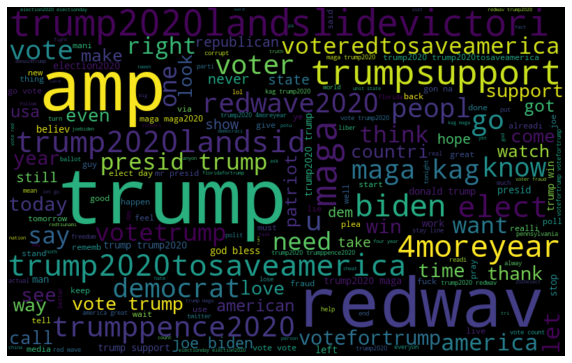

In [31]:
## Words associated with Donald Trump campaign

import matplotlib.pyplot as plt

d_words = ' '.join([text for text in t['Tweets']])
wordcloud = WordCloud(width= 800, height=500, random_state=21, max_font_size=110).generate(d_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()


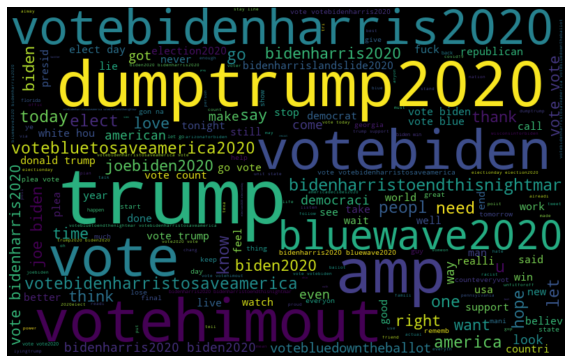

In [32]:
## Words associated with Joe Biden campaign

b_words = ' '.join([text for text in b['Tweets']])
wordcloud = WordCloud(width= 800, height=500, random_state=21, max_font_size=110).generate(b_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()


In [151]:
## Value count for both candidates

#df['Analysis'].value_counts()
Donald_trump = t["Sentiment"].value_counts().to_dict()
print(Donald_trump)

Joe_Biden = b["Sentiment"].value_counts().to_dict()
print(Joe_Biden)


{'Neutral': 38418, 'Positive': 29803, 'Negative': 10126}
{'Neutral': 32893, 'Positive': 23414, 'Negative': 7959}


In [36]:
final_df = pd.DataFrame({"Donald_trump": Donald_trump, "Joe_Biden": Joe_Biden})
final_df

,Donald_trump,Joe_Biden
Neutral,38418,32893
Positive,29803,23414
Negative,10126,7959


Text(0, 0.5, 'Candidate')

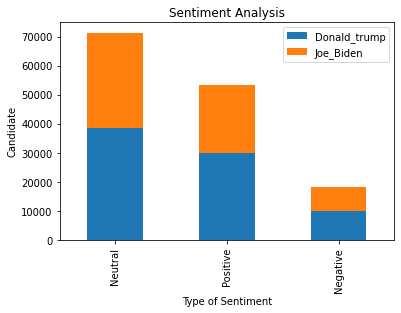

In [37]:
final_df.plot(kind='bar', stacked=True)
plt.title("Sentiment Analysis")
plt.xlabel("Type of Sentiment")
plt.ylabel("Candidate")

In [141]:
### Read Training data 

biden_annotated = pd.read_csv("C:/Users/Vishal Patil/Desktop/Data Science/Sem 3/NLP/Project/Data/Final_data/combined_annotations/biden_annotated.csv")
trump_annotated = pd.read_csv("C:/Users/Vishal Patil/Desktop/Data Science/Sem 3/NLP/Project/Data/Final_data/combined_annotations/trump_annotated.csv")


In [157]:
biden_annotated["Tweets"] = biden_annotated["Tweets"].apply(preprocessing)
biden_annotated['Polarity_Score'] = biden_annotated['Polarity'].replace({'Positive': 2, 'Negative': 1, 'Neutral': 0})
biden_annotated["Tweets"][10]
biden_annotated["Tweets"][272]

'scare covid covid covid trump2020 kag'

In [143]:
trump_annotated["Tweets"] = trump_annotated["Tweets"].apply(preprocessing)
trump_annotated['Polarity_Score'] = trump_annotated['Polarity'].replace({'Positive': 2, 'Negative': 1, 'Neutral': 0})
trump_annotated

,Unnamed: 0,Candidate_name,Hashtag,Tweets,Polarity,Polarity_Score
0,18050,Donald Trump,#MAGA,find local stopthest ralli maga maga2020,Neutral,0
1,3082,Donald Trump,#4MoreYears,ban mail ballot mailinballot election2020 elec...,Positive,2
2,19683,Donald Trump,#redwave,glad see start understand visual matter also n...,Positive,2
3,22143,Donald Trump,#redwave,guy call shot call state fool call florida cal...,Neutral,0
4,17627,Donald Trump,#MAGA,noth stop come noth stopthest maga trump4ev re...,Positive,2
...,...,...,...,...,...,...
295,17511,Donald Trump,#BlueWave2020,rock twist heavi drink lightweight mean least ...,Neutral,0
296,5678,Donald Trump,#Biden2020,trumpi go chang diaper littl shit babi biden2020,Negative,1
297,56867,Donald Trump,#VoteBlueToSaveAmerica2020,60minut underscor ridicul trump voter ohio vot...,Negative,1
298,11424,Donald Trump,#BidenHarris2020,thank vote blue let go bidenharris2020tosaveam...,Negative,1


In [144]:
#### Using tf-idf

tf=TfidfVectorizer()
text_biden = tf.fit_transform(biden_annotated['Tweets'])

X_train, X_test, y_train, y_test = train_test_split(
    text_biden, biden_annotated['Polarity_Score'], test_size=0.2, random_state=123)

# Model Generation Using Multinomial Naive Bayes
biden_clf = MultinomialNB().fit(X_train, y_train)
predicted= biden_clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))


MultinomialNB Accuracy: 0.6666666666666666


In [145]:
biden_annotated_count = biden_annotated["Polarity"].value_counts().to_dict()
print(biden_annotated_count)

trump_annotated_count = trump_annotated["Polarity"].value_counts().to_dict()
print(trump_annotated_count)
#text_biden.shape
#biden_tweeter_data.shape

{'Positive': 116, 'Negative': 95, 'Neutral': 89}
{'Negative': 116, 'Positive': 95, 'Neutral': 89}


In [146]:
## Predicting labels for biden data we collected to check accuracy of classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

tf=TfidfVectorizer()
text_biden = tf.fit_transform(biden_annotated['Tweets'])

X_train = text_biden
y_train = biden_annotated['Polarity_Score']

# Model Generation Using Multinomial Naive Bayes
biden_clf = MultinomialNB().fit(X_train, y_train)

biden_tweeter_data = tf.transform(b['Tweets'])

predicted_actual = biden_clf.predict(biden_tweeter_data)
print("MultinomialNB Accuracy:",metrics.accuracy_score(b["Polarity_Score"], predicted_actual))
print(confusion_matrix(b["Polarity_Score"], predicted_actual))
print(classification_report(b["Polarity_Score"], predicted_actual))
print(accuracy_score(b["Polarity_Score"], predicted_actual))


MultinomialNB Accuracy: 0.36011265677029847
[[ 2608   607 29678]
 [  463   268  7228]
 [ 2366   781 20267]]
              precision    recall  f1-score   support

           0       0.48      0.08      0.14     32893
           1       0.16      0.03      0.06      7959
           2       0.35      0.87      0.50     23414

    accuracy                           0.36     64266
   macro avg       0.33      0.33      0.23     64266
weighted avg       0.39      0.36      0.26     64266

0.36011265677029847


In [150]:
tf=TfidfVectorizer()
text_trump = tf.fit_transform(trump_annotated['Tweets'])

X_train, X_test, y_train, y_test = train_test_split(
    text_trump, trump_annotated['Polarity_Score'], test_size=0.2, random_state=123)
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))


MultinomialNB Accuracy: 0.7166666666666667


In [148]:
## Predicting labels for trump data we collected to check accuracy of classifier

tf=TfidfVectorizer()
text_biden = tf.fit_transform(trump_annotated['Tweets'])

X_train = text_biden
y_train = biden_annotated['Polarity_Score']

# Model Generation Using Multinomial Naive Bayes
biden_clf = MultinomialNB().fit(X_train, y_train)

biden_tweeter_data = tf.transform(t['Tweets'])

predicted_actual = biden_clf.predict(biden_tweeter_data)
print("MultinomialNB Accuracy:",metrics.accuracy_score(t["Polarity_Score"], predicted_actual))


MultinomialNB Accuracy: 0.39321224807586763
